# Fundamentals of fMRI data analysis 
## General Linear Model 1


In this assignment, your task is to complete a few linear regression excercises in Python.

You can choose to answer in Polish or English (it will not affect your grade).


-------------------

## Linear regression analysis with signals of non-neuronal origin

*Confounds* (or nuisance regressors) are variables representing fluctuations with a potential non-neuronal origin. Such non-neuronal fluctuations may drive spurious results in fMRI data analysis, including standard activation GLM and functional connectivity analyses. Read [more](https://fmriprep.readthedocs.io/en/stable/outputs.html#confounds).

Run simple and multiple linear regression to investigate associations between regressors.

Confounds regressors calculated with *fMRIPrep* are stored in data folder (`/data/sub-01_task-rhymejudgment_desc-confounds_regressors.tsv`)

### Task 1

Investigate linear relationship between *global signal* (signal from the whole brain) and signal from *white matter*.

In [33]:
pip install sklearn #Install sklearn

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#Install'


In [34]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression



In [35]:
# Load DataFrame with confounds
conf_path = 'data\sub-01_task-rhymejudgment_desc-confounds_regressors.tsv'
confounds = pd.read_csv(conf_path, delimiter='\t')

# Print all column names (use df.columns.values)
confounds.columns.values
confounds = confounds.reset_index()
confounds = confounds.dropna(0)
confounds.head()

C:\Users\karol\AppData\Local\Temp/ipykernel_24080/2748512266.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  confounds = confounds.dropna(0)


index         csf  csf_derivative1     csf_power2  csf_derivative1_power2  \
1      1  644.578523       -17.085537  415481.472246              291.915569   
2      2  635.412475        -9.166048  403749.013034               84.016440   
3      3  634.774600        -0.637874  402938.793280                0.406884   
4      4  634.872426         0.097826  403062.997290                0.009570   
5      5  634.319689        -0.552737  402361.468228                0.305518   

   white_matter  white_matter_derivative1  white_matter_derivative1_power2  \
1    580.923387                 -1.318124                         1.737452   
2    580.771837                 -0.151551                         0.022968   
3    580.034297                 -0.737539                         0.543964   
4    579.979105                 -0.055192                         0.003046   
5    580.057773                  0.078668                         0.006189   

   white_matter_power2  global_signal  ...  rot_x_derivative1_power2  \
1        337471.981745     521.348217  ...              7.799363e-07   
2        337295.926190     518.360918  ...              1.098657e-07   
3        336439.786042     518.386814  ...              9.572666e-09   
4        336375.762760     518.626567  ...              3.370499e-07   
5        336467.020217     518.100986  ...              7.978930e-08   

   rot_x_power2     rot_y  rot_y_derivative1  rot_y_derivative1_power2  \
1  2.621841e-06 -0.000964          -0.000141              1.998802e-08   
2  1.658300e-06 -0.000964           0.000000              0.000000e+00   
3  1.415886e-06 -0.000884           0.000080              6.440063e-09   
4  3.713074e-07 -0.000964          -0.000080              6.440063e-09   
5  1.068505e-07 -0.000964           0.000000              0.000000e+00   

   rot_y_power2     rot_z  rot_z_derivative1  rot_z_derivative1_power2  \
1  9.289683e-07 -0.000202           0.000420              1.762388e-07   
2  9.289683e-07 -0.000246          -0.000045              2.020502e-09   
3  7.807136e-07  0.000039           0.000285              8.135210e-08   
4  9.289683e-07  0.000216           0.000178              3.158443e-08   
5  9.289683e-07  0.000207          -0.000009              8.667610e-11   

   rot_z_power2  
1  4.061313e-08  
2  6.075091e-08  
3  1.501245e-09  
4  4.685753e-08  
5  4.291361e-08  

[5 rows x 179 columns]

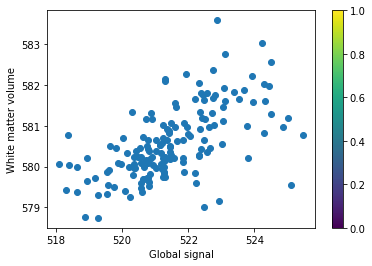

In [36]:
# Select columns representing global signal and white matter signal
global_signal = confounds['global_signal']
white_matter = confounds['white_matter']

# Plot association between these signals using on scatterplot
plt.scatter(global_signal,white_matter)
plt.xlabel('Global signal')
plt.ylabel('White matter volume')
plt.colorbar()
plt.show()

In [50]:
# Run simple linear regression for global signal and white matter signal
linear_regression = LinearRegression() 
linear_regression.fit(white_matter.values.reshape(-1, 1), global_signal.values.reshape(-1, 1))

# Print intercept and beta values (for the simple linear plotting)
print(linear_regression.intercept_)
print(linear_regression.coef_)


[-70.09297726]
[[1.01895054]]


In [51]:
#Reshaping of our arrays
global_signal.shape
white_matter.shape

global_signal.values.reshape(1,-1)
white_matter.values.reshape(1,-1)

array([[580.92338716, 580.7718366 , 580.0342973 , 579.97910545,
        580.05777317, 579.4180388 , 580.20977217, 580.49679667,
        579.87524657, 580.71607299, 580.5350823 , 580.97654981,
        581.00565361, 581.17942441, 581.96797385, 580.82418085,
        581.61980444, 582.5712612 , 583.03966878, 582.01643908,
        582.21493017, 581.83358736, 581.11005062, 581.44879156,
        581.6656463 , 581.93737898, 581.80419207, 581.76673606,
        581.46448699, 581.07493771, 581.05714582, 581.66905445,
        581.75596227, 582.37770296, 581.65368414, 581.63560077,
        581.31246557, 581.34123304, 581.5962613 , 581.80803745,
        580.98011491, 581.55970217, 580.35060499, 580.23630865,
        580.04058668, 580.46550672, 580.22110651, 580.96120192,
        581.29818273, 581.88803928, 581.18716001, 580.66202467,
        580.82573918, 580.49815321, 581.02702182, 580.66298882,
        580.87624482, 581.1697493 , 580.69737301, 581.30932648,
        580.37905855, 580.88482125, 580.

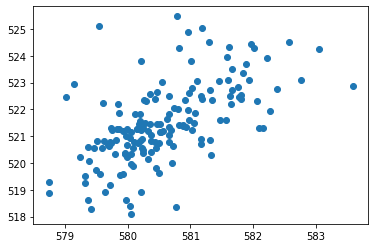

In [52]:
# Make a scatterplot representing association between signals with fitted linear regression line
linear_regression.coef_
linear_regression.intercept_

x = np.linspace(579,583,100)
y = linear_regression.intercept_ + linear_regression.coef_ * x
y = np.squeeze(y)
plt.scatter(white_matter,global_signal)


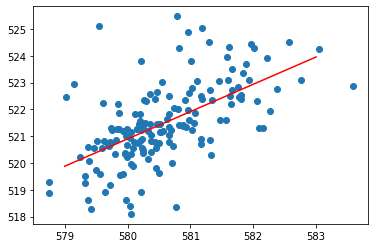

In [53]:
# Regression line (I know that it doesn't fit perfectly and something really wrong is with that scatter plot, but I don't know how to fit that (by now))
plt.scatter(white_matter,global_signal)
plt.plot(x,y, color="red")
plt.show()

In [9]:
#Check for values; dropped index and NA 
confounds.columns.values
confounds = confounds.reset_index()
confounds = confounds.dropna(0)
confounds.head()

C:\Users\karol\AppData\Local\Temp/ipykernel_24080/509543995.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  confounds = confounds.dropna(0)


level_0  index         csf  csf_derivative1     csf_power2  \
0        1      1  644.578523       -17.085537  415481.472246   
1        2      2  635.412475        -9.166048  403749.013034   
2        3      3  634.774600        -0.637874  402938.793280   
3        4      4  634.872426         0.097826  403062.997290   
4        5      5  634.319689        -0.552737  402361.468228   

   csf_derivative1_power2  white_matter  white_matter_derivative1  \
0              291.915569    580.923387                 -1.318124   
1               84.016440    580.771837                 -0.151551   
2                0.406884    580.034297                 -0.737539   
3                0.009570    579.979105                 -0.055192   
4                0.305518    580.057773                  0.078668   

   white_matter_derivative1_power2  white_matter_power2  ...  \
0                         1.737452        337471.981745  ...   
1                         0.022968        337295.926190  ...   
2                         0.543964        336439.786042  ...   
3                         0.003046        336375.762760  ...   
4                         0.006189        336467.020217  ...   

   rot_x_derivative1_power2  rot_x_power2     rot_y  rot_y_derivative1  \
0              7.799363e-07  2.621841e-06 -0.000964          -0.000141   
1              1.098657e-07  1.658300e-06 -0.000964           0.000000   
2              9.572666e-09  1.415886e-06 -0.000884           0.000080   
3              3.370499e-07  3.713074e-07 -0.000964          -0.000080   
4              7.978930e-08  1.068505e-07 -0.000964           0.000000   

   rot_y_derivative1_power2  rot_y_power2     rot_z  rot_z_derivative1  \
0              1.998802e-08  9.289683e-07 -0.000202           0.000420   
1              0.000000e+00  9.289683e-07 -0.000246          -0.000045   
2              6.440063e-09  7.807136e-07  0.000039           0.000285   
3              6.440063e-09  9.289683e-07  0.000216           0.000178   
4              0.000000e+00  9.289683e-07  0.000207          -0.000009   

   rot_z_derivative1_power2  rot_z_power2  
0              1.762388e-07  4.061313e-08  
1              2.020502e-09  6.075091e-08  
2              8.135210e-08  1.501245e-09  
3              3.158443e-08  4.685753e-08  
4              8.667610e-11  4.291361e-08  

[5 rows x 180 columns]

In [10]:
# Create DataFrame and check shape and column indexes
df = pd.DataFrame(confounds)
df.shape
df.columns

Index(['level_0', 'index', 'csf', 'csf_derivative1', 'csf_power2',
       'csf_derivative1_power2', 'white_matter', 'white_matter_derivative1',
       'white_matter_derivative1_power2', 'white_matter_power2',
       ...
       'rot_x_derivative1_power2', 'rot_x_power2', 'rot_y',
       'rot_y_derivative1', 'rot_y_derivative1_power2', 'rot_y_power2',
       'rot_z', 'rot_z_derivative1', 'rot_z_derivative1_power2',
       'rot_z_power2'],
      dtype='object', length=180)

### Task 2

*Framewise displacement* variable in confounds table (stored as `framewise_displacement`) is a quantification of the estimated bulk-head motion. Run multiple linear regression to predict `framewise_displacement` from six motion parameters (3 rotations, 3 translations). Use previously loaded confounds table.


###### * I know that is about plotting multilinear regression but I thought previously that I had to plot only simple linear regression, and when I've found that was mistake I've made the decision to keep this simple linear regression too.

In [11]:
# Filter dataframe to store only 6 motion parameters
motion = df['rot_x'] + df['rot_y'] + df['rot_z'] + df['trans_x'] + df['trans_y'] + df['trans_z']
print(motion)
# Filter dataframe to store framewise displacement
framewise_displacement = confounds['framewise_displacement']
print(framewise_displacement)


0     -0.114457
1     -0.049568
2     -0.019455
3      0.039634
4     -0.025587
         ...   
154   -0.260621
155   -0.335016
156   -0.239627
157   -0.321379
158   -0.297518
Length: 159, dtype: float64
0      0.204795
1      0.084094
2      0.066659
3      0.116312
4      0.080793
         ...   
154    0.092260
155    0.158364
156    0.182714
157    0.179263
158    0.101484
Name: framewise_displacement, Length: 159, dtype: float64


In [12]:
#Creating arrays and checking the shape
motion_parameters = np.array(motion)
framewise_displacement = np.array(framewise_displacement)
motion_parameters.shape
framewise_displacement.shape

(159,)

In [13]:
#I've checked that I can't to run linear regression with NA's, so I had to keep numerical values in all nan's
np.nan_to_num(framewise_displacement)


array([0.20479473, 0.08409435, 0.06665868, 0.11631245, 0.08079333,
       0.11307187, 0.09427235, 0.10520859, 0.14401924, 0.13976724,
       0.13445388, 0.13283846, 0.18695075, 0.0555091 , 0.08207153,
       0.03578227, 0.09104369, 0.07327748, 0.1589702 , 0.10723406,
       0.10940536, 0.12598484, 0.12999755, 0.0352702 , 0.0475594 ,
       0.10303625, 0.05444385, 0.18590945, 0.10726315, 0.11181139,
       0.16563425, 0.1392711 , 0.0894397 , 0.03343465, 0.0420832 ,
       0.0767829 , 0.105661  , 0.06187685, 0.08098055, 0.0569628 ,
       0.14529365, 0.10451955, 0.0834564 , 0.20453425, 0.1199655 ,
       0.127921  , 0.2174751 , 0.177025  , 0.17750727, 0.11447967,
       0.037784  , 0.0447933 , 0.1419385 , 0.153561  , 0.165416  ,
       0.12430105, 0.09240475, 0.1073769 , 0.0734376 , 0.0848812 ,
       0.1549704 , 0.1498383 , 0.0862752 , 0.0465159 , 0.0576037 ,
       0.07572435, 0.07937   , 0.0342739 , 0.11851905, 0.12284733,
       0.15016623, 0.178584  , 0.1567634 , 0.1395672 , 0.07401

In [14]:
#Plotting simple linear regression
linear_regression = LinearRegression()
linear_regression.fit(motion_parameters.reshape(-1,1), framewise_displacement.reshape(-1,1))

LinearRegression()

In [15]:
#Linear regression beta and intercept
linear_regression.coef_
linear_regression.intercept_



array([0.10965035])

##### This is the section for mulilinear regression

In [16]:
#I've got numpy arrays, list of motion variables and matrix
r_x = df['rot_x']
r_y = df['rot_y']
r_z = df['rot_z']
t_x = df['trans_x']
t_y = df['trans_y']
t_z = df['trans_z']
f_d = df['framewise_displacement']
all_motion = [f_d,r_x,r_y,r_z,t_x,t_y,t_z]

motion_matrix = []

# Write a for loop
for mot in all_motion:
    motion_matrix.append(mot.values.flatten())

# Print shape of matrix
motion_matrix = np.asarray(motion_matrix)
print(motion_matrix.shape)

(7, 159)


In [17]:
#I have to transpose
motion_matrix = motion_matrix.T

print(motion_matrix.shape)

(159, 7)


In [18]:
#It's first element of my matrix
motion_matrix[:,0].shape

(159,)

In [19]:
# We have to run multilinear regression
linear_regression = LinearRegression()

linear_regression.fit(X = motion_matrix[:, 1:], y = motion_matrix[:,0])


LinearRegression()

In [20]:
# We're almost there...
betas = linear_regression.coef_
print(betas)


[-3.47703684 -3.29403679  7.3812089  -0.40116933 -0.15608601 -0.08604222]


Which of the 6 motion parameter values has highest corresponding beta value?

**Answer**: If I understand that correctly, I think that the third motion value has the highest beta parameter for our y variable (I mean 'rot_z', exactly)

--------

## Linear regression on movie/TV series characters profile pictures

### Task 3

In folder `data/characters` you can find pictures of 5 characters from Harry Potter movie stored as 400$\times$400 numpy arrays (RED channel). 

Add your favourite movie/TV character from previous homework to the folder (array has to have the same dimension) and run multiple regression to predict your character from other other characters pictures. 

You can load more pictures to improve your prediction!!!


In [21]:
# Load image of your favourite character (I've changed the character to one who's fitting better to character list)
import matplotlib.pyplot as plt # General plotting
import matplotlib.image as mpimg # Loading img files
import numpy as np #For numpy arrays
import pandas as pd #For dataframes
from sklearn.linear_model import LinearRegression #For linear regression



In [22]:
pip install opencv-python #Instalation of opencv package

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#Instalation'


Wymiary zdjecia: (400, 400, 3)


(400, 400)

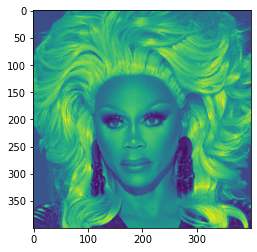

In [23]:
import numpy as np # Import numpy
import cv2 as cv # Import cv2

# Photo to matrix 
img = cv.imread('data/new_ru.jpeg') 
print('Wymiary zdjecia:', img.shape)

#Photo in grayscale
img = cv.imread('data/new_ru.jpeg', cv.IMREAD_GRAYSCALE) 
cv.imwrite('C:/Users/N/Desktop/new_ru.jpg', img)
plt.imshow(img)
img.shape


In [24]:
# Load pictures of other characters
harry = np.load('data/characters/harry.npy')
lilly = np.load('data/characters/lilly.npy')
james = np.load('data/characters/james.npy')
syrius = np.load('data/characters/syrius.npy')
voldemort = np.load('data/characters/voldemort.npy')


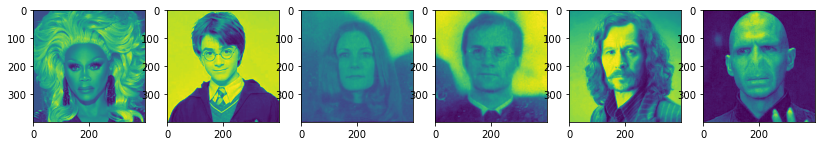

In [25]:

# Plot photos of all character on one plot
characters = [img,harry, lilly, james, syrius, voldemort]
fig, ax = plt.subplots(1,6, figsize = (14,25))

for i in range(len(characters)):
    ax[i].imshow(characters[i])

In [26]:
# Make a matrix of characters (remember to change matrices to vectors and transpose).
characters_matrix = []

for chr in characters:
    characters_matrix.append(chr.flatten())


In [27]:
#Matrix of characters
characters_matrix = np.asanyarray(characters_matrix, dtype='object')

characters_matrix.shape


(6, 160000)

In [28]:
# Transposition 
characters_matrix = characters_matrix.T

characters_matrix.shape



(160000, 6)

In [29]:
# Fit multiple linear regression to predict your favourite character from other characters

linear_regression = LinearRegression()

linear_regression.fit(X = characters_matrix[:, 1:], y = characters_matrix[:,0])
# Print intercept and beta values
betas = linear_regression.coef_
print(betas)
intercept = linear_regression.intercept_
print(intercept)

[-0.04548588  0.08451982  0.16893879  0.04265072  0.10566856]
89.24585542180078


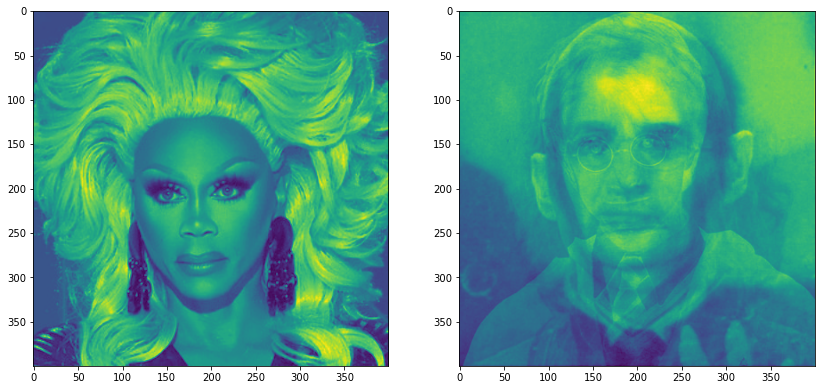

In [54]:
# Calculate your fitted character
pre_ru = betas[0] * harry + betas[1] * lilly + betas[2] * james + betas[3] * syrius + betas[4] * voldemort + linear_regression.intercept_
now = [img, pre_ru]
# Plot your original character and fitted character on a one plot (use plt.subplots)
fig, ax = plt.subplots(1,2, figsize = (14,25))

for i in range(len(now)):
    
    ax[i].imshow(now[i])


###### I dunno, why RuPaul is the Syrius now, but that's the effect

Which of the characters has highest and lowest corresponding beta values?

**Highest**: James (0.16893879)

**Lowest**: Harry (-0.04548588)